<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-geomechanics/blob/master/unconve/homework%201/homework1_unconve_geomechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1. State of Stress in Unconventional Reservoirs**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!git clone https://github.com/yohanesnuwara/reservoir-geomechanics

Cloning into 'reservoir-geomechanics'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 273 (delta 59), reused 0 (delta 0), pack-reused 135
Receiving objects: 100% (273/273), 14.30 MiB | 34.69 MiB/s, done.
Resolving deltas: 100% (115/115), done.


## Part 1: Vertical Stress and Gradient

### a. Plot density and function of depth

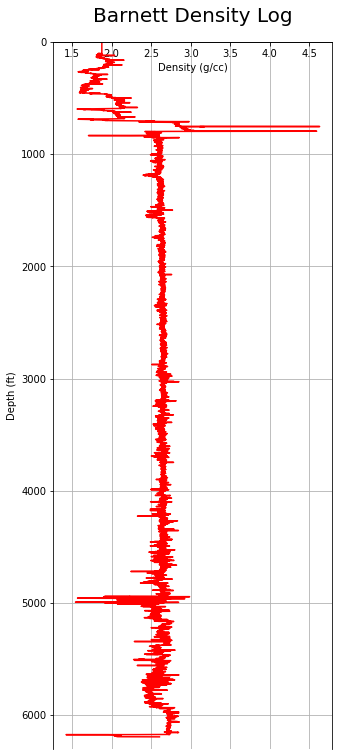

In [0]:
barnett = np.loadtxt("/content/reservoir-geomechanics/unconve/homework 1/barnett_data.txt", skiprows=1)
depth_barnett = barnett[:,0]
rho_barnett = barnett[:,1]

# plot barnett density data
plt.figure(figsize=(5, 13))

plt.plot(rho_barnett, depth_barnett, 'r')
plt.title("Barnett Density Log", pad=20, size=20)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6300)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

### b. Divide the density profile into 5 blocks (averaging the block densities)

e.g. 0-500 ft, 500-1000 ft, 1000-3000 ft, 3000-5000 ft, 5000-7000 ft.

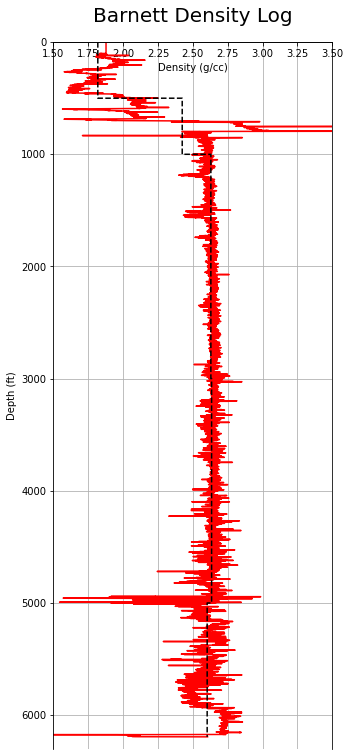

In [0]:
index1 = np.int64(np.where(depth_barnett == 500)).item()
depth1 = depth_barnett[:index1+1]
average_rho1 = np.average(rho_barnett[:index1+1])
rho1 = np.full(len(depth1), average_rho1)

index2 = np.int64(np.where(depth_barnett == 1000)).item()
depth2 = depth_barnett[index1:index2+1]
average_rho2 = np.average(rho_barnett[index1:index2+1])
rho2 = np.full(len(depth2), average_rho2)

index3 = np.int64(np.where(depth_barnett == 3000)).item()
depth3 = depth_barnett[index2:index3+1]
average_rho3 = np.average(rho_barnett[index2:index3+1])
rho3 = np.full(len(depth3), average_rho3)

index4 = np.int64(np.where(depth_barnett == 5000)).item()
depth4 = depth_barnett[index3:index4+1]
average_rho4 = np.average(rho_barnett[index3:index4+1])
rho4 = np.full(len(depth4), average_rho4)

depth5 = depth_barnett[index4:]
average_rho5 = np.average(rho_barnett[index4:])
rho5 = np.full(len(depth5), average_rho5)

# append
depth_block = np.concatenate((depth1, depth2, depth3, depth4, depth5))
rho_block = np.concatenate((rho1, rho2, rho3, rho4, rho5))

# plot the block density on the continuous log
plt.figure(figsize=(5, 13))

plt.plot(rho_barnett, depth_barnett, 'r')
plt.plot(rho_block, depth_block, '--', color='black')
plt.title("Barnett Density Log", pad=20, size=20)
plt.xlabel("Density (g/cc)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6300)
plt.xlim(1.5, 3.5)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

### c. Calculate the vertical stress (both continuous and blocked log).  Calculate hydrostatic pore pressure gradient.

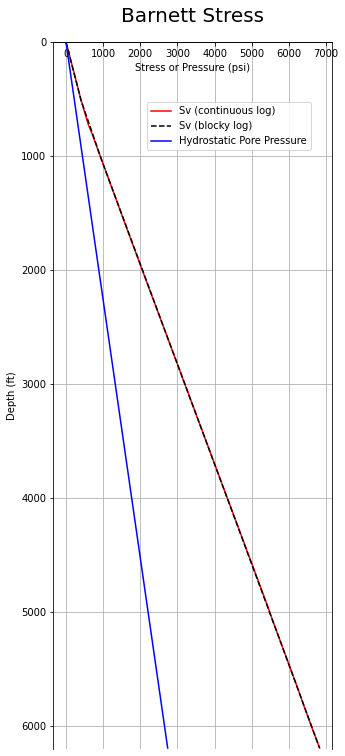

In [0]:
"calculate overburden stress from continuous log"

# conversion
rho_barnett_conv = rho_barnett * 1E+03 # convert g/cm3 to kg/m3

thickness_barnett = np.array([j-i for i, j in zip(depth_barnett[:-1], depth_barnett[1:])])
thickness_barnett = np.append([(min(depth_barnett) - 0)], thickness_barnett)

# multiply thickness by density (barnett)
rhogz_barnett = rho_barnett_conv * (thickness_barnett * 0.3048) * 9.8 # thickness divided by 0.3048 to convert ft to m
rhogz_barnett = rhogz_barnett * 0.000145038 # convert Pa to psi

# cumulative sum, calculate Sv (barnett)
sv_barnett = np.cumsum(rhogz_barnett)

"calculate overburden stress from blocky log"

# conversion
rho_block_barnett_conv = rho_block * 1E+03 # convert g/cm3 to kg/m3

thickness_block_barnett = np.array([j-i for i, j in zip(depth_block[:-1], depth_block[1:])])
thickness_block_barnett = np.append([(min(depth_block) - 0)], thickness_block_barnett)

# multiply thickness by density (barnett)
rhogz_block_barnett = rho_block_barnett_conv * (thickness_block_barnett * 0.3048) * 9.8 # thickness divided by 0.3048 to convert ft to m
rhogz_block_barnett = rhogz_block_barnett * 0.000145038 # convert Pa to psi

# cumulative sum, calculate Sv (barnett)
sv_block_barnett = np.cumsum(rhogz_block_barnett)

# hydrostatic pore pressure
rhow = 1000 # water density, kg/m3
g = 10 # gravitational acceleration, m/s2
depth_barnett_m = depth_barnett * 0.3048 # convert ft to m
Pp_hydro = (rhow * g * depth_barnett_m) * 0.000145 # Pa to psi

# plot barnett Sv, hydrostatic pore pressure result

plt.figure(figsize=(5, 13))
p1 = plt.plot(sv_barnett, depth_barnett, color='red')
p2 = plt.plot(sv_block_barnett, depth_block, '--', color='black')
p3 = plt.plot(Pp_hydro, depth_barnett, color='blue')
plt.legend((p1[0], p2[0], p3[0]), ('Sv (continuous log)', 'Sv (blocky log)', 'Hydrostatic Pore Pressure'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.title("Barnett Stress", pad=20, size=20)
plt.xlabel("Stress or Pressure (psi)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6200)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

### d. Plot vertical stress gradient as a function of depth.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


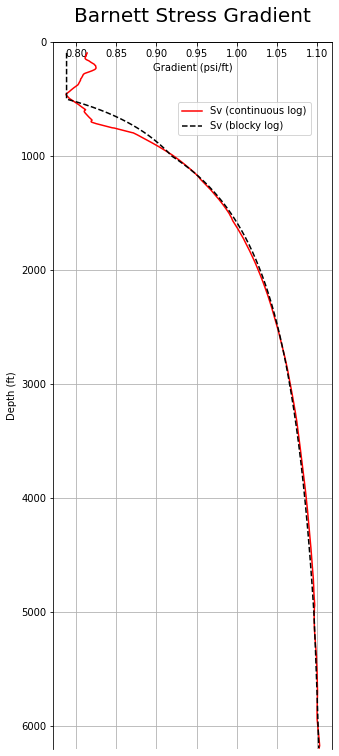

In [0]:
sv_grad = sv_barnett / depth_barnett
sv_grad_block = sv_block_barnett / depth_block

plt.figure(figsize=(5, 13))
p1 = plt.plot(sv_grad, depth_barnett, color='red')
p2 = plt.plot(sv_grad_block, depth_block, '--', color='black')
plt.legend((p1[0], p2[0]), ('Sv (continuous log)', 'Sv (blocky log)'), bbox_to_anchor=(0.04, 0.82, 0.9, 0.102))
plt.title("Barnett Stress Gradient", pad=20, size=20)
plt.xlabel("Gradient (psi/ft)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.ylim(0, 6200)
plt.gca().invert_yaxis()
plt.gca().spines['bottom'].set_position('zero')

## Part 2: Stress Polygon

### a. Calculate stress magnitude constraints for each faulting regime for ISIP = 38 MPa.

In [0]:
# known
depth = 5500 # ft
mu = 0.6 # frictional sliding coeff
Pp_grad = 0.5 # psi/ft

Pp = depth * Pp_grad # pore pressure at depth

# Sv at depth 5500 ft
find5500 = np.int64(np.where(depth_barnett == depth)).item()
Sv = sv_barnett[find5500]

Sh = 38 * 145 # MPa to psi, ISIP value from DSIT test, at 5500 ft

print('Pore pressure at depth', depth, 'ft:', Pp, 'psi')
print('Vertical stress at depth', depth, 'ft:', Sv, 'psi')
print('Minimum horizontal stress from ISIP value taken from DSIT at depth', depth, 'ft:', Sh, 'psi')

# identify where our stress regime is in
if Sh < Sv:
  print('Our stress regime is in: NF (normal faulting) or SS (strike slip)')
if Sh > Sv:
  print('Our stress regime is in: RF (reverse faulting)')

Pore pressure at depth 5500 ft: 2750.0 psi
Vertical stress at depth 5500 ft: 6049.115336827512 psi
Minimum horizontal stress from ISIP value taken from DSIT at depth 5500 ft: 5510 psi
Our stress regime is in: NF (normal faulting) or SS (strike slip)


#### General constraints

![stress-poly](https://user-images.githubusercontent.com/51282928/79632076-33550780-8187-11ea-971b-26a866428990.png)

In [0]:
# GENERAL constraints for stresses
# ratio of S1-Pp to S3-Pp
ratio = (np.sqrt((mu**2) + 1) + mu)**2

# constraints for NF: Sh < SH < Sv
Sh_lower_NF = ((Sv - Pp) / ratio) + Pp
Sh_upper_NF = Sv
SH_lower_NF = Sh_lower_NF
SH_upper_NF = Sv

print('Constraints in NF regime:')
print('Minimum horizontal stress lower constraint:', Sh_lower_NF, 'psi')
print('Minimum horizontal stress upper constraint:', Sh_upper_NF, 'psi')
print('Maximum horizontal stress lower constraint:', SH_lower_NF, 'psi')
print('Maximum horizontal stress upper constraint:', SH_upper_NF, 'psi \n')

# constraints for SS: Sh < Sv < SH
Sh_lower_SS = ((Sv - Pp) / ratio) + Pp
Sh_upper_SS = Sv
SH_lower_SS = Sv
SH_upper_SS = (ratio * (Sv - Pp)) + Pp

print('Constraints in SS regime:')
print('Minimum horizontal stress lower constraint:', Sh_lower_SS, 'psi')
print('Minimum horizontal stress upper constraint:', Sh_upper_SS, 'psi')
print('Maximum horizontal stress lower constraint:', SH_lower_SS, 'psi')
print('Maximum horizontal stress upper constraint:', SH_upper_SS, 'psi \n')

# constraints for RF: Sv < Sh < SH
SH_lower_RF = Sv
SH_upper_RF = (ratio * (Sv - Pp)) + Pp
Sh_lower_RF = Sv
Sh_upper_RF = SH_upper_RF

print('Constraints in RF regime:')
print('Minimum horizontal stress lower constraint:', Sh_lower_RF, 'psi')
print('Minimum horizontal stress upper constraint:', Sh_upper_RF, 'psi')
print('Maximum horizontal stress lower constraint:', SH_lower_RF, 'psi')
print('Maximum horizontal stress upper constraint:', SH_upper_RF, 'psi')

Constraints in NF regime:
Minimum horizontal stress lower constraint: 3807.602501442303 psi
Minimum horizontal stress upper constraint: 6049.115336827512 psi
Maximum horizontal stress lower constraint: 3807.602501442303 psi
Maximum horizontal stress upper constraint: 6049.115336827512 psi 

Constraints in SS regime:
Minimum horizontal stress lower constraint: 3807.602501442303 psi
Minimum horizontal stress upper constraint: 6049.115336827512 psi
Maximum horizontal stress lower constraint: 6049.115336827512 psi
Maximum horizontal stress upper constraint: 13041.354257244337 psi 

Constraints in RF regime:
Minimum horizontal stress lower constraint: 6049.115336827512 psi
Minimum horizontal stress upper constraint: 13041.354257244337 psi
Maximum horizontal stress lower constraint: 6049.115336827512 psi
Maximum horizontal stress upper constraint: 13041.354257244337 psi


#### Local constraint (based on data ISIP = 38 MPa)

![homework1-stress-poly](https://user-images.githubusercontent.com/51282928/79631632-d5bfbb80-8184-11ea-812c-b109c5869c07.png)

In [0]:
# lower constraint of SH at ISIP (Shmin) 38 MPa
SH38_lower = Sh
print('Lower constraint of maximum horizontal stress given ISIP', Sh, 'psi:', SH38_lower, 'psi')

# upper constraint of SH at ISIP (Shmin) 38 MPa
SH38_upper = (ratio * (Sh - Pp)) + Pp
print('Upper constraint of maximum horizontal stress given ISIP', Sh, 'psi:', SH38_upper, 'psi')

Lower constraint of maximum horizontal stress given ISIP 5510 psi: 5510 psi
Upper constraint of maximum horizontal stress given ISIP 5510 psi: 11359.622535145527 psi


### b. Calculate stress magnitude constraints for each faulting regime for ISIP = 28 MPa.

In [0]:
Sh2 = 28 * 145 # MPa to psi, ISIP value from DSIT test, at 5500 ft
print('Minimum horizontal stress from ISIP value taken from DSIT at depth', depth, 'ft:', Sh2, 'psi')

# identify where our stress regime is in
if Sh2 < Sv:
  print('Our stress regime is in: NF (normal faulting) or SS (strike slip)')
if Sh2 > Sv:
  print('Our stress regime is in: RF (reverse faulting)')

Minimum horizontal stress from ISIP value taken from DSIT at depth 5500 ft: 4060 psi
Our stress regime is in: NF (normal faulting) or SS (strike slip)


#### Local constraint (based on data ISIP = 28 MPa)

![homework1-stress-poly](https://user-images.githubusercontent.com/51282928/79631632-d5bfbb80-8184-11ea-812c-b109c5869c07.png)

In [0]:
# lower constraint of SH at ISIP (Shmin) 28 MPa
SH28_lower = Sh2
print('Lower constraint of maximum horizontal stress given ISIP', Sh2, 'psi:', SH28_lower, 'psi')

# upper constraint of SH at ISIP (Shmin) 28 MPa
SH28_upper = (ratio * (Sh2 - Pp)) + Pp
print('Upper constraint of maximum horizontal stress given ISIP', Sh2, 'psi:', SH28_upper, 'psi')

Lower constraint of maximum horizontal stress given ISIP 4060 psi: 4060 psi
Upper constraint of maximum horizontal stress given ISIP 4060 psi: 6836.451275739362 psi


### c. Construct the stress polygon

([<matplotlib.lines.Line2D at 0x7f96d654d1d0>],
 [<matplotlib.lines.Line2D at 0x7f96d654dd68>])

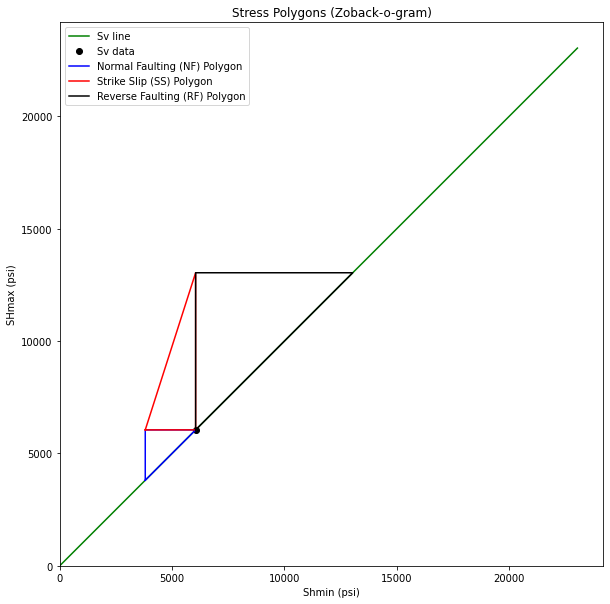

In [0]:
# access zobackogram function from Res-Geomech folder HW 6
import sys, os
sys.path.append('/content/reservoir-geomechanics/homework 6')

from zobackogram import zobackogram

zobackogram(Sv, Pp, mu)

### d. Repeat (a) and (c) using a pore pressure gradient of 0.7 psi/ft.

Pore pressure at depth 5500 ft: 3849.9999999999995 psi 



([<matplotlib.lines.Line2D at 0x7f96d6704908>],
 [<matplotlib.lines.Line2D at 0x7f96d6695400>])

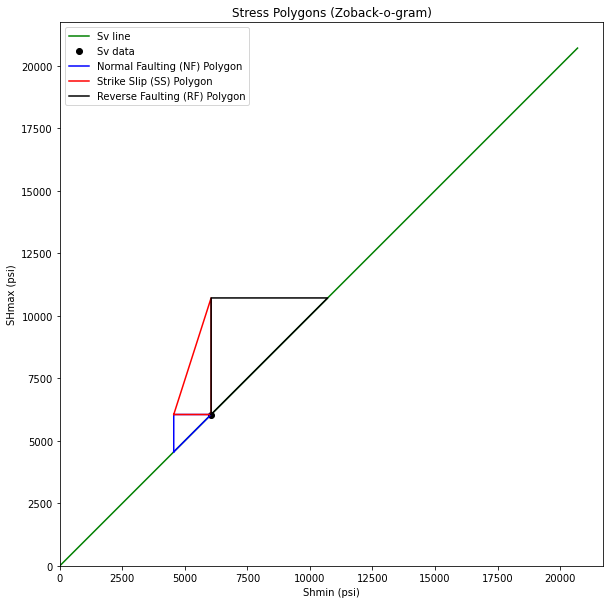

In [0]:
Pp_grad2 = 0.7 # psi/ft
Pp2 = depth * Pp_grad2
print('Pore pressure at depth', depth, 'ft:', Pp2, 'psi \n')

zobackogram(Sv, Pp2, mu)

#### General constraints

In [0]:
# upper constraint SHmax in RF regime for new pore pressure gradient 0.7 psi/ft
SH_upper2_RF = (ratio * (Sv - Pp2)) + Pp2
print('Maximum horizontal stress upper constraint:', SH_upper2_RF, 'psi')

# lower constraint Shmin in NF regime for new pore pressure gradient 0.7 psi/ft
Sh_lower2_NF = ((Sv - Pp2) / ratio) + Pp2
print('Minimum horizontal stress lower constraint:', Sh_lower2_NF, 'psi')

Maximum horizontal stress upper constraint: 10709.982957005179 psi
Minimum horizontal stress lower constraint: 4554.973801681463 psi


#### Local constraint (based on data ISIP = 38 MPa)

In [0]:
# lower constraint of SH at ISIP (Shmin) 38 MPa for new pore pressure gradient 0.7 psi/ft
SH38_lower2 = Sh
print('Lower constraint of maximum horizontal stress given ISIP', Sh, 'psi:', SH38_lower2, 'psi')

# upper constraint of SH at ISIP (Shmin) 38 MPa for new pore pressure gradient 0.7 psi/ft
SH38_upper2 = (ratio * (Sh - Pp2)) + Pp2
print('Upper constraint of maximum horizontal stress given ISIP', Sh, 'psi:', SH38_upper2, 'psi')

Lower constraint of maximum horizontal stress given ISIP 5510 psi: 5510 psi
Upper constraint of maximum horizontal stress given ISIP 5510 psi: 9028.251234906369 psi


## Questions

### Question 1. What is the logged density in the Barnett shale at 5500 ft depth in g/cc?

In [0]:
rho5500 = rho_barnett[find5500]
print('Density at depth', depth, 'ft is:', rho5500, 'g/cc')

Density at depth 5500 ft is: 2.594 g/cc


### Question 2. What is the vertical stress and pore pressure in the Barnett shale well at 5500 ft depth in MPa? (Refer to Part 1c)

In [0]:
print('Vertical stress at depth', depth, 'ft:', Sv / 145, 'MPa')
print('Pore pressure at depth', depth, 'ft:', Pp_hydro[find5500] / 145, 'MPa')

Vertical stress at depth 5500 ft: 41.71803680570698 MPa
Pore pressure at depth 5500 ft: 16.764000000000003 MPa


### Question 3. What is the vertical stress gradient in the Barnett shale well at 5500 ft depth in psi/ft? (Refer to Part 1d)

In [0]:
sv_grad5500 = sv_grad[find5500]
print('Vertical stress gradient at depth', depth, 'ft is:', sv_grad5500, 'psi/ft')

Vertical stress gradient at depth 5500 ft is: 1.0998391521504567 psi/ft


### Question 4. Refer to Part 2a and 2c

#### What is the upper bound on SHmax from reverse faulting in MPa?

In [0]:
print('Maximum horizontal stress upper constraint:', SH_upper_RF / 145, 'MPa')

Maximum horizontal stress upper constraint: 89.94037418789198 MPa


#### What is the lower bound on Shmin from normal faulting in MPa?

In [0]:
print('Minimum horizontal stress lower constraint:', Sh_lower_NF / 145, 'MPa')

Minimum horizontal stress lower constraint: 26.259327596153813 MPa


#### Given an ISIP of 38 MPa, what is the upper bound on SHmax in MPa?

In [0]:
SH38_upper = (ratio * (Sh - Pp)) + Pp
print('Lower constraint of maximum horizontal stress given ISIP', Sh, 'psi:', SH38_upper / 145, 'MPa')

Lower constraint of maximum horizontal stress given ISIP 5510 psi: 78.34222438031398 MPa


#### Given an ISIP of 38 MPa, what is the lower bound on Shmin in MPa?

In [0]:
SH38_lower = Sh
print('Lower constraint of maximum horizontal stress given ISIP', Sh, 'psi:', SH38_lower / 145, 'MPa')

Lower constraint of maximum horizontal stress given ISIP 5510 psi: 38.0 MPa


### Question 5. Given an ISIP of 38 MPa, which of the following stress states are possible?

In [0]:
# identify where our stress regime is in
if Sh < Sv:
  print('Our stress regime is in: NF (normal faulting) or SS (strike slip)')
if Sh > Sv:
  print('Our stress regime is in: RF (reverse faulting)')

Our stress regime is in: NF (normal faulting) or SS (strike slip)


### Question 6. Refer to Part 2b

#### Given an ISIP of 28 MPa, what is the upper bound on SHmax in MPa?

In [0]:
SH28_upper = (ratio * (Sh2 - Pp)) + Pp
print('Lower constraint of maximum horizontal stress given ISIP', Sh2, 'psi:', SH28_upper / 145, 'psi')

Lower constraint of maximum horizontal stress given ISIP 4060 psi: 47.14793983268526 psi


#### Given an ISIP of 28 MPa, what is the lower bound on Shmin in MPa?

In [0]:
SH28_lower = Sh2
print('Lower constraint of maximum horizontal stress given ISIP', Sh2, 'psi:', SH28_lower / 145, 'psi')

Lower constraint of maximum horizontal stress given ISIP 4060 psi: 28.0 psi


### Question 7. Refer to Part 2d

#### What is the upper bound on SHmax from reverse faulting in MPa?

In [0]:
print('Maximum horizontal stress upper constraint:', SH_upper2_RF / 145, 'MPa')

Maximum horizontal stress upper constraint: 73.86195142762192 MPa


#### What is the lower bound on Shmin from normal faulting in MPa?

In [0]:
print('Minimum horizontal stress lower constraint:', Sh_lower2_NF / 145, 'MPa')

Minimum horizontal stress lower constraint: 31.4136124253894 MPa


#### Given an ISIP of 38 MPa, what is the upper bound on SHmax in MPa?

In [0]:
print('Upper constraint of maximum horizontal stress given ISIP', Sh, 'psi:', SH38_upper2 / 145, 'MPa')

Upper constraint of maximum horizontal stress given ISIP 5510 psi: 62.26380162004392 MPa


#### Given an ISIP of 38 MPa, what is the lower bound on SHmax in MPa?

In [0]:
print('Lower constraint of maximum horizontal stress given ISIP', Sh, 'psi:', SH38_lower2 / 145, 'MPa')

Lower constraint of maximum horizontal stress given ISIP 5510 psi: 38.0 MPa


### Question 8. How does overpressure affect the stress polygon and the range of allowable stress states?

Answer: Decreases the size of the stress polygon and range of allowable stress states